# 운항실적(AFSNT.csv)
### 2017.1.1 ~ 2019. 6.30 운항한 항공편의 실적데이터
- SDT_YY: 연
- SDT_MM: 월
- SDT_DD: 일
- SDT_DY: 요일
- ARP: 공항
- ODP: 상대공항
- FLO: 항공사
- FLT: 편명 (항공노선의 고유번호)
- REG: 등록기호 (항공기의 고유번호)-> 8263 null
- AOD: 출도착 (A:도착, D:출발)
- IRR: 부정기편 (Y:부정기, N:정기)
- STT: 계획시각
- ATT: 실제시각
- DLY: 지연여부 (Y:지연, N:정상)
- DRR: 지연사유
- CNL: 결항여부 (Y:결항, N:정상)
- CNR: 결항사유

### '항공편(노선)' 지연여부 예측
계획시각 대비 실제시각이 **국제선** 1시간, **국내선** 30분 초과시 
- 연결지연: 등록기호가 같은(같은 항공기에 대해) 계속 지연이 생김. 

### 987709 rows × 17 columns

In [2]:
import pandas as pd

afsnt = pd.read_csv('AFSNT2.csv', encoding='CP949', engine='python')
afsnt.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,C02,N,NaN
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN


In [3]:
afsnt.info()  # 987709개 data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 entries, 0 to 987708
Data columns (total 17 columns):
SDT_YY    987709 non-null int64
SDT_MM    987709 non-null int64
SDT_DD    987709 non-null int64
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
FLO       987709 non-null object
FLT       987709 non-null object
REG       979446 non-null object
AOD       987709 non-null object
IRR       987709 non-null object
STT       987709 non-null object
ATT       987709 non-null object
DLY       987709 non-null object
DRR       118937 non-null object
CNL       987709 non-null object
CNR       8259 non-null object
dtypes: int64(3), object(14)
memory usage: 128.1+ MB


### REG(등록기호, 항공기 고유번호) 8263 null

In [4]:
afsnt[afsnt.REG.isnull()]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
2736,2017,1,10,화,ARP13,ARP3,J,J1921,NaN,A,N,14:00,0:00,N,NaN,Y,A02
2737,2017,1,10,화,ARP13,ARP3,J,J1920,NaN,D,N,14:35,0:00,N,NaN,Y,A02
2887,2017,1,10,화,ARP3,ARP13,J,J1921,NaN,D,N,13:10,0:00,N,NaN,Y,A02
2888,2017,1,10,화,ARP3,ARP13,J,J1920,NaN,A,N,15:25,0:00,N,NaN,Y,A02
3579,2017,1,13,금,ARP13,ARP3,J,J1920,NaN,D,N,14:35,0:00,N,NaN,Y,A02
3580,2017,1,13,금,ARP14,ARP3,J,J1855,NaN,A,N,12:15,0:00,N,NaN,Y,A02
3581,2017,1,13,금,ARP14,ARP3,J,J1854,NaN,D,N,13:10,0:00,N,NaN,Y,A02
3582,2017,1,13,금,ARP13,ARP3,J,J1921,NaN,A,N,14:00,0:00,N,NaN,Y,A02
3788,2017,1,13,금,ARP3,ARP13,J,J1920,NaN,A,N,15:25,0:00,N,NaN,Y,A02
3789,2017,1,13,금,ARP3,ARP13,J,J1921,NaN,D,N,13:10,0:00,N,NaN,Y,A02


### 지연(Y): 118937, 정상(N): 868772

In [6]:
afsnt.DLY.value_counts()

N    868772
Y    118937
Name: DLY, dtype: int64

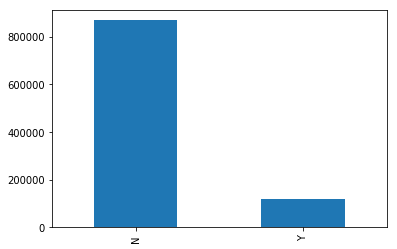

In [8]:
import matplotlib.pyplot as plt
afsnt.DLY.value_counts().plot(kind='bar')
plt.show()

### 결항(Y): 979450, 정상(N): 8259

In [78]:
afsnt.CNL.value_counts()

N    979450
Y      8259
Name: CNL, dtype: int64

#### 지연(Y)

In [10]:
afsnt[afsnt.DLY=='Y']

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,C02,N,NaN
5,2017,1,1,일,ARP3,ARP6,J,J1959,SEw3NTk5,D,N,16:45,17:21,Y,C02,N,NaN
17,2017,1,1,일,ARP1,ARP3,J,J1235,SEw3NzE2,A,N,18:55,19:29,Y,C02,N,NaN
22,2017,1,1,일,ARP8,ARP3,J,J1908,SEw3NzE2,D,N,16:20,16:53,Y,C02,N,NaN
35,2017,1,1,일,ARP1,ARP3,J,J1247,SEw3NzE4,A,N,22:00,22:32,Y,C02,N,NaN
42,2017,1,1,일,ARP6,ARP3,J,J1958,SEw3NzE4,D,N,15:10,15:45,Y,C02,N,NaN
116,2017,1,1,일,ARP3,ARP1,J,J1235,SEw3NzE2,D,N,17:45,18:35,Y,C02,N,NaN
136,2017,1,1,일,ARP3,ARP1,J,J1247,SEw3NzE4,D,N,20:55,21:38,Y,C02,N,NaN
150,2017,1,1,일,ARP3,ARP1,J,J1237,SEw3NTY5,D,N,18:40,19:13,Y,C02,N,NaN
182,2017,1,1,일,ARP3,ARP1,J,J1249,SEw3NzI3,D,N,21:05,21:36,Y,C02,N,NaN


- C02 (A/C 접속): 107738건 **90.6%**
- C01 (A/C 정비): 2031건 **1.7%**
- A01 (안개): 1524건 **1.3%**
- C10 (제방빙작업): 1227건 **1%**

In [9]:
afsnt[afsnt.DLY=='Y'].DRR.value_counts()

C02    107738
C01      2031
A01      1524
C10      1227
D01       950
C03       907
C14       873
Z99       664
A05       596
B01       417
A02       361
C04       315
C11       189
A10       164
A99       139
B03       123
C05       122
C09       106
A07        75
A09        72
C06        67
A04        49
C13        43
Z01        34
C16        33
A03        33
D03        32
A06        27
C07         5
C15         5
C12         3
B07         3
B08         3
B06         3
B04         3
B02         1
Name: DRR, dtype: int64

### IRR(부정기편)-> 21625개 data는 부정기편

In [19]:
afsnt.IRR.value_counts()

N    966084
Y     21625
Name: IRR, dtype: int64

### FLO(항공사) 12개

In [20]:
afsnt.FLO.value_counts().sort_index()  # 항공사. test data엔 M항공사 있는데 이 data에는 없음.

A    177187
B    135235
C         3
D         2
E         1
F     88110
G         1
H    131935
I     95074
J    276447
K         2
L     83712
Name: FLO, dtype: int64

### FLT(편명. 항공노선의 고유번호) 
- **같은 항공편**에 대해서는 a공항->b공항 / b공항->a공항
- a공항->b공항 이라고 항공편이 같은 것은 아님.

In [60]:
afsnt.FLT.value_counts().sort_index()

A1001      544
A1002      612
A1003      354
A1004      258
A1005      220
A1006      260
A1007       62
A1008       62
A1009       64
A1010       64
A1107A       1
A1120     1818
A1121     1818
A1123        2
A1123A       1
A1124     1822
A1125      798
A1126       12
A1127     1036
A1128     1822
A1129     1822
A1140     1624
A1141     1818
A1142     1814
A1143     1822
A1144     1818
A1145     1820
A1146     1788
A1147     1788
A1148     1822
          ... 
L1803     1456
L1804     1832
L1805     1828
L1806     1826
L1807     1828
L1808     1828
L1809      925
L1810     1441
L1810A       1
L1811      516
L1813      373
L1815      438
L1816      438
L1821      294
L1828      294
L1831      126
L1832      252
L1833      252
L1838      126
L1901      922
L1902     1820
L1903     1818
L1904     1818
L1905     1822
L1906     1822
L1907      901
L1908       20
L1909       18
L1931     1814
L1932     1822
Name: FLT, Length: 1541, dtype: int64

In [26]:
afsnt[afsnt.FLT=='L1804']

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
363669,2017,1,1,일,ARP4,ARP3,L,L1804,SEw4MjM3,A,N,15:40,15:39,N,NaN,N,NaN
363741,2017,1,1,일,ARP3,ARP4,L,L1804,SEw4MjM3,D,N,14:45,15:08,N,NaN,N,NaN
363760,2017,1,2,월,ARP4,ARP3,L,L1804,SEw4MjY4,A,N,15:40,15:29,N,NaN,N,NaN
363830,2017,1,2,월,ARP3,ARP4,L,L1804,SEw4MjY4,D,N,14:45,14:58,N,NaN,N,NaN
363857,2017,1,3,화,ARP4,ARP3,L,L1804,SEw4MDIx,A,N,15:40,15:41,N,NaN,N,NaN
363929,2017,1,3,화,ARP3,ARP4,L,L1804,SEw4MDIx,D,N,14:45,15:02,N,NaN,N,NaN
363947,2017,1,4,수,ARP4,ARP3,L,L1804,SEw4MjY4,A,N,15:40,15:39,N,NaN,N,NaN
364021,2017,1,4,수,ARP3,ARP4,L,L1804,SEw4MjY4,D,N,14:45,15:04,N,NaN,N,NaN
364065,2017,1,5,목,ARP4,ARP3,L,L1804,SEw4MDcw,A,N,15:40,15:34,N,NaN,N,NaN
364119,2017,1,5,목,ARP3,ARP4,L,L1804,SEw4MDcw,D,N,14:45,15:00,N,NaN,N,NaN


In [28]:
afsnt[(afsnt.ARP=='ARP3') & (afsnt.ODP=='ARP4') & (afsnt.FLO=='L')]

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
363741,2017,1,1,일,ARP3,ARP4,L,L1804,SEw4MjM3,D,N,14:45,15:08,N,NaN,N,NaN
363742,2017,1,1,일,ARP3,ARP4,L,L1803,SEw4MDY3,A,N,10:10,14:02,Y,C01,N,NaN
363743,2017,1,1,일,ARP3,ARP4,L,L1807,SEw4MDY3,A,N,20:35,20:54,N,NaN,N,NaN
363744,2017,1,1,일,ARP3,ARP4,L,L1806,SEw4MDY3,D,N,17:45,18:37,Y,C02,N,NaN
363745,2017,1,1,일,ARP3,ARP4,L,L1805,SEw4MjM3,A,N,17:05,17:20,N,NaN,N,NaN
363746,2017,1,1,일,ARP3,ARP4,L,L1810,SEw4MjY4,D,N,8:25,8:40,N,NaN,N,NaN
363747,2017,1,1,일,ARP3,ARP4,L,L1808,SEw4MjY4,D,N,19:10,19:28,N,NaN,N,NaN
363748,2017,1,1,일,ARP3,ARP4,L,L1811,SEw4MjY4,A,N,11:05,11:02,N,NaN,N,NaN
363830,2017,1,2,월,ARP3,ARP4,L,L1804,SEw4MjY4,D,N,14:45,14:58,N,NaN,N,NaN
363831,2017,1,2,월,ARP3,ARP4,L,L1806,SEw4MjY4,D,N,17:45,18:14,N,NaN,N,NaN


In [41]:
afsnt[afsnt.FLT=='L1908']

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
372941,2017,4,11,화,ARP8,ARP3,L,L1908,SEw4MjY4,A,Y,16:30,16:42,N,NaN,N,NaN
372979,2017,4,11,화,ARP3,ARP8,L,L1908,SEw4MjY4,D,Y,15:45,16:14,N,NaN,N,NaN
373134,2017,4,13,목,ARP8,ARP3,L,L1908,SEw4MjM1,A,Y,16:30,17:34,Y,C02,N,NaN
373171,2017,4,13,목,ARP3,ARP8,L,L1908,SEw4MjM1,D,Y,15:45,17:02,Y,C02,N,NaN
373594,2017,4,18,화,ARP8,ARP3,L,L1908,SEw4MDg2,A,Y,16:30,17:34,Y,C02,N,NaN
373633,2017,4,18,화,ARP3,ARP8,L,L1908,SEw4MDg2,D,Y,15:45,17:03,Y,C02,N,NaN
373787,2017,4,20,목,ARP8,ARP3,L,L1908,SEw4MDg2,A,Y,16:30,16:57,N,NaN,N,NaN
373825,2017,4,20,목,ARP3,ARP8,L,L1908,SEw4MDg2,D,Y,15:45,16:29,Y,C02,N,NaN
374247,2017,4,25,화,ARP8,ARP3,L,L1908,SEw4MDQ3,A,Y,16:30,15:48,N,NaN,N,NaN
374285,2017,4,25,화,ARP3,ARP8,L,L1908,SEw4MDQ3,D,Y,15:45,15:48,N,NaN,N,NaN


In [36]:
afsnt[(afsnt.ARP=='ARP3') & (afsnt.ODP=='ARP8') & (afsnt.FLO=='L')].sort_values(by='FLT')

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
785085,2018,10,1,월,ARP3,ARP8,L,L1901,SEw4MjUz,A,N,10:15,10:14,N,NaN,N,NaN
779404,2018,7,31,화,ARP3,ARP8,L,L1901,SEw4MDMw,A,N,10:15,10:24,N,NaN,N,NaN
771598,2018,5,7,월,ARP3,ARP8,L,L1901,SEw4MDI0,A,N,10:15,10:34,N,NaN,N,NaN
771514,2018,5,6,일,ARP3,ARP8,L,L1901,SEw4MzA2,A,N,10:15,10:19,N,NaN,N,NaN
779494,2018,8,1,수,ARP3,ARP8,L,L1901,SEw4MDI0,A,N,10:15,10:37,N,NaN,N,NaN
977610,2019,3,14,목,ARP3,ARP8,L,L1901,SEw4MjM3,A,N,10:15,10:22,N,NaN,N,NaN
792038,2018,12,16,일,ARP3,ARP8,L,L1901,SEw4MDU2,A,N,10:15,10:14,N,NaN,N,NaN
771424,2018,5,5,토,ARP3,ARP8,L,L1901,SEw4MjM3,A,N,10:15,10:18,N,NaN,N,NaN
771335,2018,5,4,금,ARP3,ARP8,L,L1901,SEw4MjM3,A,N,10:15,10:34,N,NaN,N,NaN
977697,2019,3,15,금,ARP3,ARP8,L,L1901,SEw4MzI0,A,N,10:15,10:12,N,NaN,N,NaN


In [37]:
afsnt[(afsnt.ARP=='ARP8') & (afsnt.ODP=='ARP3') & (afsnt.FLO=='L')].sort_values(by='FLT')

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
785030,2018,10,1,월,ARP8,ARP3,L,L1901,SEw4MjUz,D,N,9:25,9:40,N,NaN,N,NaN
779367,2018,7,31,화,ARP8,ARP3,L,L1901,SEw4MDMw,D,N,9:25,9:53,N,NaN,N,NaN
771530,2018,5,7,월,ARP8,ARP3,L,L1901,SEw4MDI0,D,N,9:25,10:00,Y,C02,N,NaN
771457,2018,5,6,일,ARP8,ARP3,L,L1901,SEw4MzA2,D,N,9:25,9:40,N,NaN,N,NaN
779452,2018,8,1,수,ARP8,ARP3,L,L1901,SEw4MDI0,D,N,9:25,10:01,Y,C02,N,NaN
977564,2019,3,14,목,ARP8,ARP3,L,L1901,SEw4MjM3,D,N,9:25,9:47,N,NaN,N,NaN
791970,2018,12,16,일,ARP8,ARP3,L,L1901,SEw4MDU2,D,N,9:25,9:37,N,NaN,N,NaN
771354,2018,5,5,토,ARP8,ARP3,L,L1901,SEw4MjM3,D,N,9:25,9:50,N,NaN,N,NaN
771271,2018,5,4,금,ARP8,ARP3,L,L1901,SEw4MjM3,D,N,9:25,10:09,Y,C02,N,NaN
977645,2019,3,15,금,ARP8,ARP3,L,L1901,SEw4MzI0,D,N,9:25,9:36,N,NaN,N,NaN


In [ ]:
L1901      922
L1902     1820
L1903     1818
L1904     1818
L1905     1822
L1906     1822
L1907      901
L1908       20
L1909       18


In [64]:
afsnt[afsnt.FLT=='L1902'][afsnt.ARP!='ARP3'][afsnt.ARP!='ARP8']

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
981421,2019,4,24,수,ARP2,ARP7,L,L1902,SEw4MzAw,A,Y,19:20,20:25,Y,Z99,N,NaN
981422,2019,4,24,수,ARP7,ARP2,L,L1902,SEw4MzAw,D,Y,18:50,19:52,Y,Z99,N,NaN


In [67]:
afsnt[afsnt.FLT=='L1905'][afsnt.ARP!='ARP3'][afsnt.ARP!='ARP8']

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
979978,2019,4,9,화,ARP7,ARP3,L,L1905,SEw4MjM3,D,Y,14:45,15:16,Y,A05,N,NaN


In [68]:
afsnt[afsnt.FLT=='L1906'][afsnt.ARP!='ARP3'][afsnt.ARP!='ARP8']

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
979977,2019,4,9,화,ARP7,ARP3,L,L1906,SEw4MjM3,A,Y,14:15,14:18,N,NaN,N,NaN


In [69]:
afsnt[afsnt.FLT=='L1907'][afsnt.ARP!='ARP3'][afsnt.ARP!='ARP8']

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
763777,2018,2,6,화,ARP1,ARP8,L,L1907,SEw4MDcw,A,Y,22:40,22:35,N,NaN,N,NaN


In [72]:
afsnt[afsnt.FLT=='L1907']

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
363689,2017,1,1,일,ARP8,ARP3,L,L1907,SEw4MjUz,D,N,14:30,15:18,Y,C02,N,NaN
363735,2017,1,1,일,ARP3,ARP8,L,L1907,SEw4MjUz,A,N,15:15,15:56,Y,C02,N,NaN
363752,2017,1,2,월,ARP8,ARP3,L,L1907,SEw4MjUz,D,N,15:20,15:39,N,NaN,N,NaN
363823,2017,1,2,월,ARP3,ARP8,L,L1907,SEw4MjUz,A,N,16:05,16:18,N,NaN,N,NaN
363870,2017,1,3,화,ARP8,ARP3,L,L1907,SEw4MjM3,D,N,14:30,14:55,N,NaN,N,NaN
363921,2017,1,3,화,ARP3,ARP8,L,L1907,SEw4MjM3,A,N,15:15,15:22,N,NaN,N,NaN
363977,2017,1,4,수,ARP8,ARP3,L,L1907,SEw4MjUz,D,N,16:05,16:18,N,NaN,N,NaN
364014,2017,1,4,수,ARP3,ARP8,L,L1907,SEw4MjUz,A,N,16:50,16:52,N,NaN,N,NaN
364035,2017,1,5,목,ARP8,ARP3,L,L1907,SEw4MjUz,D,N,15:20,15:26,N,NaN,N,NaN
364107,2017,1,5,목,ARP3,ARP8,L,L1907,SEw4MjUz,A,N,16:05,15:57,N,NaN,N,NaN


### 공항 15개

In [73]:
afsnt.ARP.value_counts().sort_index()  # 공항. 15개. (설명회에서는 국제,국내 14개로 적혀있는데..)

ARP1     310665
ARP10        12
ARP11      3658
ARP12      4880
ARP13      4248
ARP14      1897
ARP15     13696
ARP2     121513
ARP3     393607
ARP4      33623
ARP5      16321
ARP6      34472
ARP7       3163
ARP8      33195
ARP9      12759
Name: ARP, dtype: int64

In [74]:
afsnt.ODP.value_counts().sort_index()  # 상대공항. 15개.

ARP1     308825
ARP10         7
ARP11      3653
ARP12      4877
ARP13      4248
ARP14      1896
ARP15     16383
ARP2     121030
ARP3     393429
ARP4      33515
ARP5      16318
ARP6      34427
ARP7       3149
ARP8      33191
ARP9      12761
Name: ODP, dtype: int64